# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
#import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#build the dataframe
city_data_df = pd.DataFrame(columns=(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 
                                      'Wind Speed', 'Country', 'Date']))
#load cities in df
city_data_df['City'] = cities

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
rec_num = 1
failed = 0

print("Beginning Data Retrieval")    
print("-----------------------------")

for index, row in city_data_df.iterrows():
    city = row['City']
    try:
        query_url = f"{base_url}q={city}&units={units}&appid={weather_api_key}"  
        response = requests.get(query_url).json() 
        #load city weather data into data frame
        city_data_df.loc[index, 'City'] = response['name']
        city_data_df.loc[index, 'Lat'] = response['coord']['lat']
        city_data_df.loc[index, 'Lng'] = response['coord']['lon']
        city_data_df.loc[index, 'Max Temp'] = response['main']['temp_max'] ### Farenheit ###
        city_data_df.loc[index, 'Humidity'] = response['main']['humidity'] ### percentage ###
        city_data_df.loc[index, 'Cloudiness'] = response['clouds']['all'] ### percentage ###
        city_data_df.loc[index, 'Wind Speed'] = response['wind']['speed'] ### mph ###
        city_data_df.loc[index, 'Country'] = response['sys']['country']
        city_data_df.loc[index, 'Date'] = response['dt']
        print(f"Processing Record #{rec_num} city name: {row['City']}")
        rec_num += 1
    except (KeyError, IndexError):
        print(f"{row['City']} not found skipping...")
        city_data_df.drop(index, inplace=True)
        failed += 1
        
print(f"Number of records skipped: {failed}")
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record #1 city name: Vardø
Processing Record #2 city name: Mataura
Processing Record #3 city name: Bubaque
Processing Record #4 city name: Kloulklubed
Processing Record #5 city name: Mihail Kogălniceanu
Processing Record #6 city name: Punta Arenas
Processing Record #7 city name: Cap Malheureux
Processing Record #8 city name: Tuktoyaktuk
Processing Record #9 city name: Srandakan
sentyabrskiy not found skipping...
Processing Record #10 city name: peniche
Processing Record #11 city name: victoria
Processing Record #12 city name: faanui
Processing Record #13 city name: hobart
Processing Record #14 city name: ushuaia
Processing Record #15 city name: vostok
Processing Record #16 city name: esperance
Processing Record #17 city name: khowai
Processing Record #18 city name: rawson
Processing Record #19 city name: vanimo
Processing Record #20 city name: dongning
Processing Record #21 city name: port alfred
Processing Record #22 ci

Processing Record #180 city name: kaniama
miranorte not found skipping...
Processing Record #181 city name: ahipara
Processing Record #182 city name: panguipulli
Processing Record #183 city name: kedgwick
Processing Record #184 city name: lac-megantic
Processing Record #185 city name: bilibino
Processing Record #186 city name: honiara
Processing Record #187 city name: mehamn
Processing Record #188 city name: cherskiy
Processing Record #189 city name: mayo
guicheng not found skipping...
Processing Record #190 city name: mogok
Processing Record #191 city name: santa fe
Processing Record #192 city name: lucapa
Processing Record #193 city name: nyurba
Processing Record #194 city name: rabo de peixe
Processing Record #195 city name: ponta do sol
Processing Record #196 city name: male
Processing Record #197 city name: airai
Processing Record #198 city name: gravdal
Processing Record #199 city name: port elizabeth
Processing Record #200 city name: camopi
Processing Record #201 city name: aksu

Processing Record #356 city name: tayturka
Processing Record #357 city name: northam
Processing Record #358 city name: nemuro
Processing Record #359 city name: moroni
Processing Record #360 city name: tura
Processing Record #361 city name: khorramshahr
Processing Record #362 city name: kanchanaburi
Processing Record #363 city name: dwarka
Processing Record #364 city name: asosa
Processing Record #365 city name: touros
Processing Record #366 city name: nankana sahib
Processing Record #367 city name: kurmanayevka
Processing Record #368 city name: xining
Processing Record #369 city name: wanaka
Processing Record #370 city name: biak
Processing Record #371 city name: aykhal
Processing Record #372 city name: thinadhoo
Processing Record #373 city name: pemba
Processing Record #374 city name: ust-kuyga
yanan not found skipping...
Processing Record #375 city name: kingisepp
Processing Record #376 city name: ballina
Processing Record #377 city name: broome
Processing Record #378 city name: dudi

Processing Record #538 city name: road town
Processing Record #539 city name: novyy urgal
Processing Record #540 city name: wuwei
Processing Record #541 city name: phalombe
masjed-e soleyman not found skipping...
Processing Record #542 city name: papara
Processing Record #543 city name: belmonte
Processing Record #544 city name: chara
Processing Record #545 city name: papetoai
Processing Record #546 city name: shizuishan
Processing Record #547 city name: arys
Processing Record #548 city name: dashitou
Processing Record #549 city name: imeni vorovskogo
Processing Record #550 city name: ojinaga
Processing Record #551 city name: moindou
Processing Record #552 city name: novobirilyussy
Processing Record #553 city name: zoetermeer
Processing Record #554 city name: ganzhou
Processing Record #555 city name: oyama
Processing Record #556 city name: kutum
Processing Record #557 city name: itigi
Processing Record #558 city name: haputale
Processing Record #559 city name: ahar
Processing Record #5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df.to_csv(output_data_file, index=False)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardø,70.3705,31.1107,37.4,56,0,4.61,NO,1618799771
1,Mataura,-46.1927,168.864,61,77,49,10,NZ,1618800371
2,Bubaque,11.2833,-15.8333,76.93,72,59,12.66,GW,1618799797
3,Kloulklubed,7.0419,134.256,75.2,94,90,8.05,PW,1618799887
4,Mihail Kogălniceanu,44.3667,28.45,45,87,90,5.75,RO,1618800371


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [69]:
city_data_df['Humidity'].max()

100

In [70]:
#  Get the indices of cities that have humidity over 100%.
#  N/A

In [71]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [72]:
#read in cities.csv file to data frame
weather_df = pd.read_csv("output_data/cities.csv")
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardø,70.3705,31.1107,37.40,56,0,4.61,NO,1618799771
1,Mataura,-46.1927,168.8643,61.00,77,49,10.00,NZ,1618800371
2,Bubaque,11.2833,-15.8333,76.93,72,59,12.66,GW,1618799797
3,Kloulklubed,7.0419,134.2556,75.20,94,90,8.05,PW,1618799887
4,Mihail Kogălniceanu,44.3667,28.4500,45.00,87,90,5.75,RO,1618800371


## Latitude vs. Temperature Plot

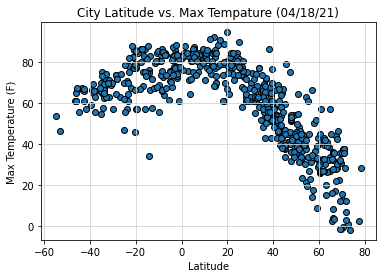

In [73]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolors='black')
plt.title("City Latitude vs. Max Tempature (04/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

plt.savefig('output_data/LatVsMaxTemp')
plt.show()

## Latitude vs. Humidity Plot

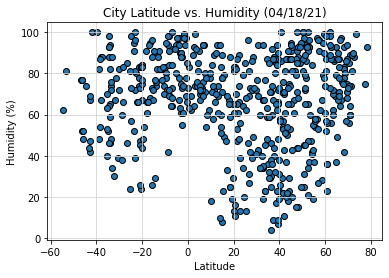

In [74]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolors='black')
plt.title("City Latitude vs. Humidity (04/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which='major',axis='both',linestyle="-",color='lightgrey')

plt.savefig('output_data/LatVsHumid')
plt.show()

## Latitude vs. Cloudiness Plot

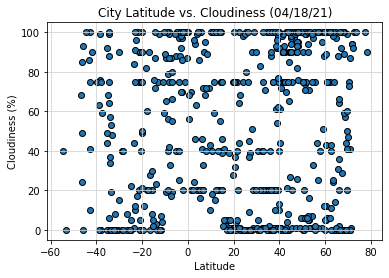

In [75]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs. Cloudiness (04/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

plt.savefig('output_data/LatVsCloud')
plt.show()

## Latitude vs. Wind Speed Plot

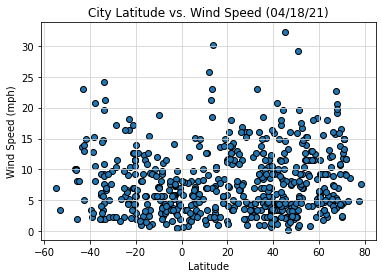

In [76]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs. Wind Speed (04/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

plt.savefig('output_data/LatVsWind')
plt.show()

## Linear Regression

In [77]:
north_hemi = weather_df.loc[weather_df['Lat'] >= 0]
south_hemi = weather_df.loc[weather_df['Lat'] < 0]
north_count = len(north_hemi)
south_count = len(south_hemi)
print(f"There are {north_count} cities in the northern hemisphere from the dataframe.")
print(f"There are {south_count} cities in the southern hemisphere from the dataframe.")

There are 398 cities in the northern hemisphere from the dataframe.
There are 175 cities in the southern hemisphere from the dataframe.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

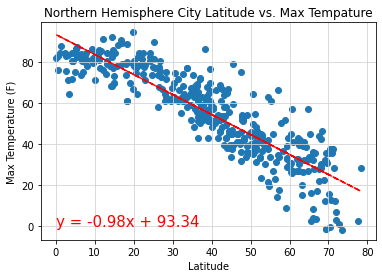

The r-value is: 0.7828540453592394


In [78]:
north_hemi_lat = north_hemi['Lat']
north_hemi_max_temp = north_hemi['Max Temp']
# Perform a linear regression for the Northern Hemisphere on cities max temp vs latitude
ntl_slope, ntl_int, ntl_r, ntl_p, ntl_std_err = linregress(north_hemi_lat, north_hemi_max_temp)

# Create equation of line to calculate predicted max temp
ntl_fit = ntl_slope * north_hemi_lat + ntl_int

# Create line equation string
line_eq = f"y = {ntl_slope:1.2f}x + {ntl_int:1.2f}"

plt.scatter(north_hemi_lat, north_hemi_max_temp)
plt.plot(north_hemi_lat, ntl_fit, "--", color = 'r')

plt.title("Northern Hemisphere City Latitude vs. Max Tempature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(0, 0),fontsize=15,color="red")

#plt.savefig('output_data/NorthHemiLatVsMaxTemp')
plt.show()

print(f"The r-value is: {ntl_r**2}") #square this?

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

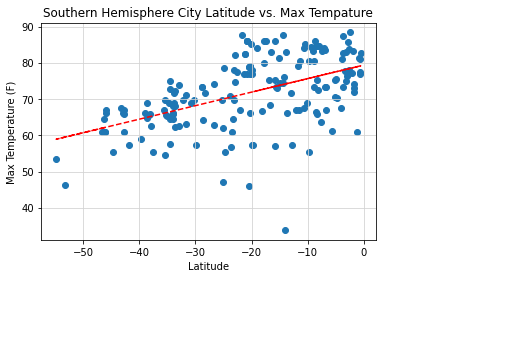

The r-value is: 0.2620263857999086


In [79]:
south_hemi_lat = south_hemi['Lat']
south_hemi_max_temp = south_hemi['Max Temp']
# Perform a linear regression for the Northern Hemisphere on cities max temp vs latitude
stl_slope,stl_int, stl_r, stl_p, stl_std_err = linregress(south_hemi_lat, south_hemi_max_temp)

# Create equation of line to calculate predicted max temp
stl_fit = stl_slope * south_hemi_lat + stl_int

# Create line equation string
line_eq = f"y = {stl_slope:1.2f}x + {stl_int:1.2f}"

plt.scatter(south_hemi_lat, south_hemi_max_temp)
plt.plot(south_hemi_lat, stl_fit, "--", color = 'r')

plt.title("Southern Hemisphere City Latitude vs. Max Tempature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(0, 0),fontsize=15,color="red")

#plt.savefig('output_data/SouthHemiLatVsMaxTemp')
plt.show()

print(f"The r-value is: {stl_r**2}") #square this?

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression